# Laboratorio 1: Exploración y Visualización de Datos

Integrantes: 
- Sergio Daniel Ignacio Romero Véliz
- Esteban Araneda Sierra


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

## Pongamonos en situación

Eres un **cientifico de datos** que trabaja en **Netflix**.

En los últimos años ha **crecido la cantidad usuarios que ven anime** en la plataforma, por lo que el equipo de contenido de Netflix ha decidido invertir en la producción de series de anime.

Tu jefe te ha pedido que **realices un análisis de los datos de las series de anime** para entender mejor el mercado y poder tomar decisiones informadas.

## Datos

Para realizar esta tarea, te han entregado un dataset con información de animes de la página **MyAnimeList** (MAL).

FUENTE: https://www.kaggle.com/datasets/azathoth42/myanimelist

Tenemos 2 archivos:
- `anime.csv`: Contiene 6 atributos: "title", "type", "source", "episodes", "airing" y "studio", que corresponden a información sobre el anime.
- `anime-stats.csv`: Contiene 4 atributos: "title", "score", "members" (número de usuarios que tienen el anime en su lista) y "favorites", que corresponden a estadísticas sobre la popularidad de cada anime.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Para que la siguiente celda funcione, los archivos CSV deben estar en la misma carpeta que este notebook.

In [3]:
df_anime = pd.read_csv('anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('anime-stats.csv', encoding="UTF-8")

También puedes cargarlos remotamente de un repositorio usando el link a los archivos:


In [4]:
df_anime = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime-stats.csv', encoding="UTF-8")

Cualquiera de estas 2 formas es válida para cargar los datos.

## Exploración básica


Para hacernos una idea de como se ven los datos, lo más usual es mostrar los primeros registros de cada dataset.

1. Muestre los primeros 5 registros de cada dataset.

In [5]:
df_anime.head(5)

,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff


In [6]:
df_stats.head(5)

,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082


Siempre es útil conocer **cuántos datos y cuántas columnas** tenemos.

Esto es importante para poder responder
- ¿Tenemos suficientes datos?
- ¿Tenemos suficientes columnas?
- ¿Será muy caro computacionalmente trabajar con estos datos?

2. ¿Cuales son las dimensiones de cada dataset? en otras palabras, ¿cuántas filas y columnas tiene cada uno?

In [7]:
print(f"df-anime: filas: {df_anime.shape[0]} columnas: {df_anime.shape[1]}")

df-anime: filas: 14478 columnas: 6


In [8]:
print(f"df-stats: filas: {df_stats.shape[0]} columnas: {df_stats.shape[1]}")

df-stats: filas: 14478 columnas: 4


3. Además de ver algunos registros y las dimensiones, también es útil conocer algunas **estadísticas básicas** de los datos. Usa una función que nos permita **ver las estadísticas básicas** de **todas las columnas**.

In [9]:
df_anime.describe(include = 'all')

,title,type,source,episodes,airing,studio
count,14478,14478,14478,14478.000000,14478,8544
unique,14477,7,16,NaN,2,456
top,Hinamatsuri,TV,Unknown,NaN,False,Toei Animation
freq,2,4271,4210,NaN,14127,735
mean,NaN,NaN,NaN,11.308399,NaN,NaN
std,NaN,NaN,NaN,43.443451,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN


In [10]:
df_stats.describe(include = 'all')

,title,score,members,favorites
count,14478,14478.000000,1.447800e+04,14478.000000
unique,14477,NaN,NaN,NaN
top,Hinamatsuri,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,6.142482,2.296640e+04,311.649606
std,NaN,1.463981,7.498136e+04,2615.554211
min,NaN,0.000000,0.000000e+00,0.000000
25%,NaN,5.550000,2.450000e+02,0.000000
50%,NaN,6.370000,1.679500e+03,2.000000
75%,NaN,7.060000,1.037900e+04,23.000000


## Posibles errores en los datos

Al construir los datasets, es posible que se hayan generado **datos duplicados**, ya sea porque alguien ingresó dos veces la misma información, o porque se generó un error en la recolección de datos. Es importante **detectar y decidir qué hacer con estos datos**.

4.  ¿Existen filas duplicadas en alguno de los dataframes?


In [11]:
df_anime[df_anime.duplicated()]

,title,type,source,episodes,airing,studio


In [12]:
df_stats[df_stats.duplicated()]

,title,score,members,favorites


Otro caso común es que existan **valores nulos** en los datos. Al igual que antes, es importante **identificarlos y decidir qué hacer con ellos**.

5.  ¿Hay filas con valores nulos en los dataframes?

In [13]:
df_anime.loc[df_anime.isna().any(axis=1)]

# Si hay filas con NaN en studio

,title,type,source,episodes,airing,studio
56,Boku wa Kuma,Music,Original,1,False,NaN
57,Ane Koi: Suki Kirai Daisuki.,OVA,Manga,2,False,NaN
58,Parasol Henbei,TV,Unknown,200,False,NaN
61,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,OVA,Unknown,1,False,NaN
64,Ko Ko Ro,OVA,Unknown,2,False,NaN
...,...,...,...,...,...,...
14472,Minna no Taabou Konnichiwa,OVA,Original,1,False,NaN
14473,Gutchonpa Omoshiro Hanashi,TV,Unknown,5,False,NaN
14474,Geba Geba Shou Time!,OVA,Unknown,1,False,NaN
14475,Godzilla: Hoshi wo Kuu Mono,Movie,Other,1,False,NaN


In [14]:
df_stats.loc[df_stats.isna().any(axis=1)]

# No hay

,title,score,members,favorites


Consideremos que estamos en la situación en la que **decidimos eliminar los valores nulos**.

6. En caso de existir valores nulos, elimine las filas que los contengan. ¿Cuántas filas quedan en cada dataset luego de eliminar los valores nulos?

In [15]:
df_anime = df_anime.dropna()
len(df_anime)

8544

In [16]:
df_stats = df_stats.dropna()
len(df_stats)

14478

## Juntemos nuestros datos

Con el objetivo de tener toda la información en un solo dataframe, y así poder responder preguntas más complejas, **unamos ambos dataframes**.

7. Junte ambos dataframes en uno solo **a través de la columna "title"** con un **inner join**, y **muestre los primeros 5 registros** de este nuevo dataframe.

In [17]:
joined_df = pd.merge(df_anime, df_stats, on='title', how="inner")
joined_df.head()

,title,type,source,episodes,airing,studio,score,members,favorites
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082


## Obtengamos información de los datos

Ahora tenemos que entender un poco más sobre los datos que tenemos, para que el equipo de contenido pueda tomar decisiones informadas.

Para esto, tu jefe te ha solicitado las siguientes tareas:

8. "Necesitamos saber cuales son los animes más populares." Para esto, **entrega los 5 animes con más miembros** (número de usuarios que tienen el anime en su lista).

In [18]:
joined_df.sort_values("members", ascending=False).head()

,title,type,source,episodes,airing,studio,score,members,favorites
4846,Death Note,TV,Manga,37,False,Madhouse,8.67,1456378,88696
4974,Shingeki no Kyojin,TV,Manga,25,False,Wit Studio,8.49,1345842,64032
3826,Sword Art Online,TV,Light novel,25,False,A-1 Pictures,7.64,1301616,50042
1602,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895
5393,One Punch Man,TV,Web manga,12,False,Madhouse,8.73,1020754,30747


9. Esta información puede ser muy valiosa para identificar alguna característica en común de los animes más populares. **Realiza una observación de alguna característica en común, o algo relevante, de los 5 animes** obtenidos en la pregunta anterior.

R: Todos los animes del top 5 fueron emitidos en TV y todos tienen score sobre 7.

10. Además de un anime popular, el equipo te dice que quiere hacer un anime de mucha calidad, osea, que sea muy bien evaluado, en particular buscan que tenga un score mayor a 9.0. **Entrega los con score mayor a 9.0**.

In [19]:
joined_df.loc[joined_df['score']>9].sort_values("score", ascending= False)

,title,type,source,episodes,airing,studio,score,members,favorites
8528,Dokidoki Little Ooyasan,OVA,Other,0,True,Collaboration Works,9.52,357,21
1602,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895
666,Kimi no Na wa.,Movie,Original,1,False,CoMix Wave Films,9.19,730076,34912
3755,Steins;Gate 0,TV,Visual novel,23,True,White Fox,9.15,223989,1882
803,Gintama°,TV,Manga,51,False,Bandai Namco Pictures,9.15,198744,5668
1866,Steins;Gate,TV,Visual novel,24,False,White Fox,9.14,1010330,92423
287,Hunter x Hunter (2011),TV,Manga,148,False,Madhouse,9.11,720920,64375
5481,Gintama&#039;,TV,Manga,51,False,Sunrise,9.11,215527,4549
7788,Ginga Eiyuu Densetsu,OVA,Novel,110,False,Artland,9.11,124993,8567
839,3-gatsu no Lion 2nd Season,TV,Manga,22,False,Shaft,9.10,85744,2257


11. Ahora tu equipo desea analizar a la competencia. Para esto **entrega los 5 estudios de anime con mejor score promedio entre sus animes**.

In [20]:
mean_score_studio = joined_df.groupby('studio')['score'].mean()

mean_score_studio.to_frame().sort_values('score', ascending=False).head()

,score
studio,
Odolttogi,7.870000
B&amp;T,7.820000
Fuji TV,7.730000
Studio Rikka,7.688571
D &amp; D Pictures,7.635000


12. Después de que te preguntaran por los animes que tienen mejor score, se te ocurre crear una columna que indique cuales animes son "buenos". Para esto, el área de producto te indica que un "mal" anime tiene score bajo 4.0, uno "intermedio" tiene score entre 4.0 y 8.0, y uno "bueno" tiene score sobre 8.0. **Usa el método apply para crear una nueva columna "quality" que tenga como valor "Malo", "Intermedio" o "Bueno" según la definición anterior. Luego, muestra los 5 primeros registros**

In [21]:
def isGoated(anime):
    if anime['score'] < 4:
        return 'Malo'
    elif anime['score'] < 8:
        return "Intermedio"
    else:
        return "Bueno"

joined_df['quality'] = joined_df.apply(lambda x: isGoated(x), axis=1)
joined_df.head()

,title,type,source,episodes,airing,studio,score,members,favorites,quality
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809,Intermedio
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579,Intermedio
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802,Intermedio
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344,Bueno
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082,Bueno


13. Rodrigo, un miembro del equipo, te dice: "Si deseamos que la gente nos tenga en sus favoritos, ¿qué tipo de anime deberíamos hacer? Para cada tipo de anime (TV, OVA, Movie, etc) podríamos sumar la cantidad de favoritos, y hacer el tipo de anime que tenga la suma más grande". Sin embargo, tú te percatas de que **hay un problema con lo que él propone**. ¿Cuál es este problema?

R: El problema es que no toma en cuenta el tamaño del conjunto de cada tipo de anime

14. Para mostrarle a Rodrigo el problema con la solución que él propuso, **entrega la cantidad de animes por cada tipo**.

In [22]:
joined_df.value_counts(subset='type')

type
TV         3508
OVA        1753
Special    1339
Movie      1293
ONA         505
Music       136
Unknown      11
Name: count, dtype: int64

15. Tu jefe te dice que tuvo una visión en un sueño, te dice que sabe como hacer el anime más famoso. Quiere hacer un anime de tipo OVA, donde la fuente (columna source) sea Novel. **Entrega las columnas title, members, favorites, y quality de todos los animes que cumplan con estas características**.

In [23]:
weird_dreams = joined_df.loc[
    (joined_df['type']=='OVA')&
    (joined_df['source']=='Novel')
    ][['title', 'members', 'favorites', 'quality']]
weird_dreams

,title,members,favorites,quality
418,Mobile Suit Gundam Unicorn,52688,1066,Bueno
605,H. P. Lovecraft&#039;s The Dunwich Horror and ...,2099,4,Intermedio
894,Ginga Eiyuu Densetsu Gaiden (1999),10381,15,Bueno
1599,X Densha de Ikou,1549,8,Intermedio
1905,The Hakkenden,4982,10,Intermedio
2568,Kubikiri Cycle: Aoiro Savant to Zaregototsukai,44763,290,Intermedio
3225,Another: The Other - Inga,110815,113,Intermedio
3324,Takarajima Memorial: Yuunagi to Yobareta Otoko,749,0,Intermedio
3339,Big Wars: Kami Utsu Akaki Kouya ni,1810,5,Intermedio
3388,Lodoss-tou Senki,36070,366,Intermedio


16. Para verificar si tu jefe tiene sueños extraños, o si realmente tiene una visión, **calcula y muestra el promedio de los miembros, el promedio de los favoritos, y la categoría de quality más repetida** de los animes obtenidos en la pregunta anterior.

In [45]:
mean_members = float(weird_dreams['members'].mean())
mean_favorites = float(weird_dreams['favorites'].mean())
mode_quality = weird_dreams['quality'].mode().values[0]

print(f"promedio miembros: {mean_members} \npromedio favoritos: {mean_favorites} \nmoda quality: {mode_quality}")

promedio miembros: 20791.451612903227 
promedio favoritos: 351.96774193548384 
moda quality: Intermedio


# Visualicemos los datos

17. Muestre el histograma de todas las puntuaciones de animes

<Axes: >

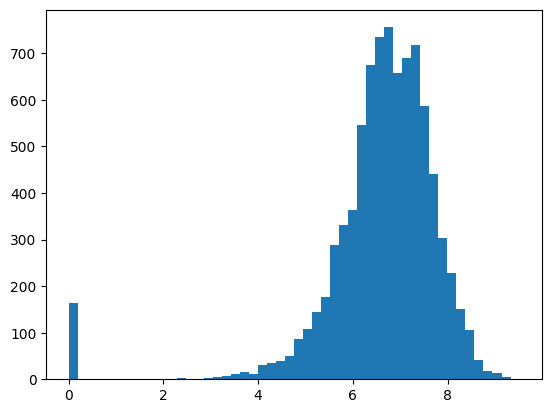

In [25]:
joined_df['score'].hist(bins=50, grid=False)

18. Muestre la densidad de puntajes para los principales tipos de anime (TV, OVA, Movie)

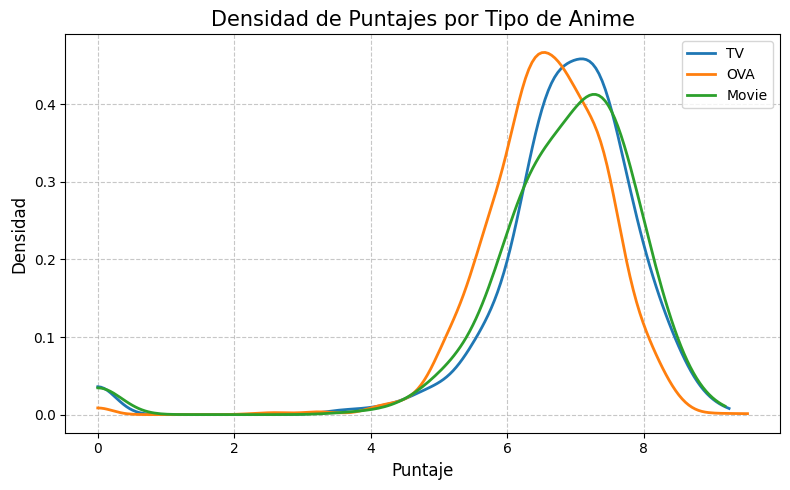

In [36]:
from scipy import stats
import numpy as np


plt.figure(figsize=(8, 5))

for anime_type in ['TV', 'OVA', 'Movie']:
    subset = joined_df[joined_df['type'] == anime_type]['score']
    density = stats.gaussian_kde(subset)
    
    xs = np.linspace(subset.min(), subset.max(), 200)
    
    density_values = density(xs)
    
    plt.plot(xs, density_values, linewidth=2, label=anime_type)

plt.title('Densidad de Puntajes por Tipo de Anime', fontsize=15)
plt.xlabel('Puntaje', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [44]:
m1 = float(joined_df[joined_df['type'] == 'TV']['score'].mean())
m2 = float(joined_df[joined_df['type'] == 'Movie']['score'].mean())
m3 = float(joined_df[joined_df['type'] == 'OVA']['score'].mean())

print(f'Mediana de puntaje de TV: {m1}, Movie: {m2}, diff: {m1-m2}')

Mediana de puntaje de TV: 6.773383694412771, Movie: 6.729628770301624, diff: 0.043754924111146565


19. ¿Cuál tipo de anime es más exitoso? ¿Se está tomando en cuenta la cantidad de animes por tipo al afirmar eso?

R: Podemos decir que el tipo de anime más exitoso es 'TV', sus puntajes están muy concentrados entre 6 y 8 y su mediana es ligeramente mayor a la de 'Movie'. Esta conclusión sí toma en cuenta la cantidad de animes por tipo porque utiliza las densidades en vez de los valores en sí.

Y eso es todo por hoy :)


![](https://i.imgur.com/ghKLs78.jpeg)